# TEAMID PPNT2022TMID50017

## Visualzing and predicting Heart disease with interactive dashboard

# Heart Disease Prediction Using Machine Learning Approach

#### Heart disease (HD) is a major cause of mortality in modern society. Medical diagnosis is an extremely important but complicated task that should be Performed Accurately and Efficiently

#### Cardiovascular disease is difficult to detect due to several risk factors, including high blood pressure, cholesterol, and an abnormal pulse rate.

#### In this machine learning project, we have collected the dataset from Kaggle(https://www.kaggle.com/search?q=heart+disease+prediction) and we will be using Machine Learning to make predictions on whether a person is suffering from Heart Disease or not.

### Problem Statement
 #### * Complete analysis of Heart Disease Kaggle Dataset
 
 #### * To predict whether a person has a heart disease or not based on the various biological and physical parameters
 
 ### Machine Learning Algorithms
  #### * Random Forest Classifier
  #### * K-Nearest Neighbors Classifier
  #### * Decision Tree Classifier
  #### * Naive Bayes Classifier
  
  ## Import libraries

Let's first import all the necessary libraries. We will use numpy and pandas to start with. For visualization, we will usepyplot subpackage of matplotlib, use rcParams to add styling to the plots and rainbow for colors and seaborn. For implementing Machine Learning models and processing of data, we will use the sklearn library.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
import seaborn as sns
%matplotlib inline

In [ ]:
For processing the data, we'll import a few libraries. To split the available dataset for testing and training, we'll use the train_test_split method. To scale the features, we are using StandardScaler.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from warnings import filterwarnings
filterwarnings("ignore")

In [2]:
#model validation
from sklearn.metrics import log_loss,roc_auc_score,precision_score,f1_score,recall_score,roc_curve,auc,plot_roc_curve
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score,fbeta_score,matthews_corrcoef
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix

ModuleNotFoundError: No module named 'mlxtend'

#### For model validation, we'll import a few libraries

In [ ]:
#extra
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import SelectFwe, f_regression

#### Next, we will import all the Machine Learning algorithms

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

## Import Dataset

In [3]:
dataset = pd.read_csv('HeartDataset.csv',sep=',',encoding="utf-8")

## Data Preparation and Exploration

In [4]:
type(dataset)

pandas.core.frame.DataFrame

In [5]:
dataset.shape

(270, 14)

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  HeartDisease             270 non-null    int64  
dtypes: float64(1), int64(13)
m

In [7]:
dataset.columns

Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'HeartDisease'],
      dtype='object')

In [8]:
dataset.describe()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,HeartDisease
count,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.000000,270.00000,270.000000,270.000000,270.000000,270.000000
mean,54.433333,0.677778,3.174074,131.344444,249.659259,0.148148,1.022222,149.677778,0.329630,1.05000,1.585185,0.670370,4.696296,0.444444
std,9.109067,0.468195,0.950090,17.861608,51.686237,0.355906,0.997891,23.165717,0.470952,1.14521,0.614390,0.943896,1.940659,0.497827
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,213.000000,0.000000,0.000000,133.000000,0.000000,0.00000,1.000000,0.000000,3.000000,0.000000
50%,55.000000,1.000000,3.000000,130.000000,245.000000,0.000000,2.000000,153.500000,0.000000,0.80000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,280.000000,0.000000,2.000000,166.000000,1.000000,1.60000,2.000000,1.000000,7.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.20000,3.000000,3.000000,7.000000,1.000000


In [9]:
dataset

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,HeartDisease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


In [10]:
dataset.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,HeartDisease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


In [11]:
dataset.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
HeartDisease               0
dtype: int64

In [12]:
dataset.apply(lambda x:len(x.unique()))

Age                         41
Sex                          2
Chest pain type              4
BP                          47
Cholesterol                144
FBS over 120                 2
EKG results                  3
Max HR                      90
Exercise angina              2
ST depression               39
Slope of ST                  3
Number of vessels fluro      4
Thallium                     3
HeartDisease                 2
dtype: int64

In [14]:
print('Chest pain type',dataset['Chest pain type'].unique())
print('FBS over 120',dataset['FBS over 120'].unique())
print('EKG results ',dataset['EKG results'].unique())
print('Exercise angina',dataset['Exercise angina'].unique())
print('Slope of ST',dataset['Slope of ST'].unique())
print('Number of vessels fluro',dataset['Number of vessels fluro'].unique())
print(' Thallium',dataset['Thallium'].unique())

Chest pain type [4 3 2 1]
FBS over 120 [0 1]
EKG results  [2 0 1]
Exercise angina [0 1]
Slope of ST [2 1 3]
Number of vessels fluro [3 0 1 2]
 Thallium [3 7 6]


## Dataset Description

#### This dataset consists of 14 features and a HeartDisease  variable. The detailed description of all the features are as follows:

#### 1. Age: Patients Age in years (Numeric)

#### 2. Sex: Gender of patient (Male - 1, Female - 0)(Nominal)

#### 3. Chest Pain Type: Type of chest pain experienced by patient categorized into :(Nominal)

#### * Value 1: Typical angina

#### * Value 2: Atypical angina

#### * Value 3: Non-anginal pain

#### * Value 4: Asymptomatic

#### (Angina: Angina is caused when there is not enough oxygen-rich blood flowing to a certain part of the heart. The arteries of the heart become narrow due to fatty deposits in the artery walls. The narrowing of arteries means that blood supply to the heart is reduced, causing angina.)



#### 4. BP: Level of blood pressure at resting mode in mm/HG (Numerical)


#### 5. cholestrol: Serum cholestrol in mg/dl (Numeric)

##### (Cholesterol means the blockage for blood supply in the blood vessels)


####  6.FBS over 120: Blood sugar levels on fasting > 120 mg/dl represents as 1 in case of true and 0 as false (Nominal)

#### (blood sugar taken after a long gap between a meal and the test. Typically, it's taken before any meal in the morning.)


#### 7. EKG results :

 #### * Value 0: Normal
 #### * Value 1: Having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
 #### * Value 2: Showing probable or definite left ventricular hypertrophy by Estes' criteria.
 
 
 
 #### 8.Max HR:
 
 #### Estimation maximum HR rate is about 90
 
 
 
 #### 9.Exercise angina: Exercise induced angina (1 = yes; 0 = no)
 #### (is chest pain while exercising or doing any physical activity.)
 

 
 
 
 
 #### 10.ST depression :
 
 #### Exercise induced ST-depression in comparison with the state of rest (Numeric)
 
 #### (ST Depression is the difference between value of ECG at rest and after exercise. An electrocardiogram records the electrical signals in your heart. It's a common and painless test used to quickly detect heart problems and monitor your heart's health. Electrocardiograms — also called ECGs or EKGs — are often done in a doctor's office, a clinic or a hospital room. ECG machines are standard equipment in operating rooms and ambulances. Some personal devices, such as smart watches.)

#### 11.slope of ST: ST segment measured in terms of slope during peak exercise (Nominal)

 #### * Value 1: Upsloping
 #### * Value 2: Flat
 #### * Value 3: Downsloping
 
 #### 12.Number of vessels fluro:Number of major blood vessels (0-3)(Numeric)

####  (Fluoroscopy is an imaging technique that uses X-rays to obtain real-time moving images of the interior of an object. In its primary application of medical imaging, a fluoroscope allows a physician to see the internal structure and function of a patient, so that the pumping action of the heart or the motion of swallowing, for example, can be watched)



####  13.Thallium

  #### * Value 3: normal
  #### * Value 6: fixed defect
  #### * Value 7: reversibe defect
  
  #### 14.HeatDisease :arget: It is the target variable which we have to predict 2 means patient is suffering from heart risk and 1 means patient is normal. (0 = no disease; 1 = disease)
 
    
    


## Data Visualization

#### Now let's see various visual representations of the data to understand more about relationship between various features.

## Distribution of Heart disease
 
 #### It's always a good practice to work with a dataset where the target classes are of approximately equal size. Thus, let's check for the same.

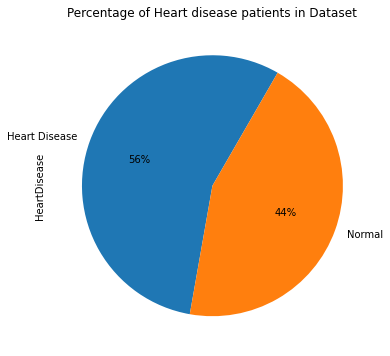

In [15]:
fig, (ax1) = plt.subplots(nrows=1, ncols=1, sharey=False, figsize=(14,6))

ax1 = dataset['HeartDisease'].value_counts().plot.pie( x="Heart disease" ,y ='no.of patients', 
                   autopct = "%1.0f%%",labels=["Heart Disease","Normal"], startangle = 60,ax=ax1);
ax1.set(title = 'Percentage of Heart disease patients in Dataset')
plt.show()

In [17]:
y = dataset["HeartDisease"]

0    150
1    120
Name: HeartDisease, dtype: int64


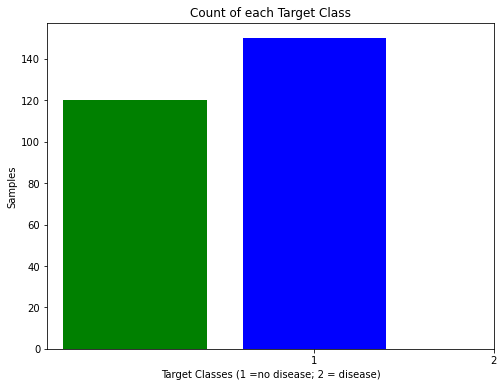

In [19]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['HeartDisease'].unique(), dataset['HeartDisease'].value_counts(), color = ['blue', 'green'])
plt.xticks([1, 2])
plt.xlabel('Target Classes (1 =no disease; 2 = disease)')
plt.ylabel('Samples')
plt.title('Count of each Target Class')
HeartDisease_temp = dataset.HeartDisease.value_counts()
print(HeartDisease_temp)

#### From the total dataset of 270 patients, 150 (56%) have a heart disease (target=2)

#### Next, we'll take a look at the histograms for each variable.

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Sex'}>],
       [<AxesSubplot:title={'center':'Chest pain type'}>,
        <AxesSubplot:title={'center':'BP'}>],
       [<AxesSubplot:title={'center':'Cholesterol'}>,
        <AxesSubplot:title={'center':'FBS over 120'}>],
       [<AxesSubplot:title={'center':'EKG results'}>,
        <AxesSubplot:title={'center':'Max HR'}>],
       [<AxesSubplot:title={'center':'Exercise angina'}>,
        <AxesSubplot:title={'center':'ST depression'}>],
       [<AxesSubplot:title={'center':'Slope of ST'}>,
        <AxesSubplot:title={'center':'Number of vessels fluro'}>],
       [<AxesSubplot:title={'center':'Thallium'}>,
        <AxesSubplot:title={'center':'HeartDisease'}>]], dtype=object)

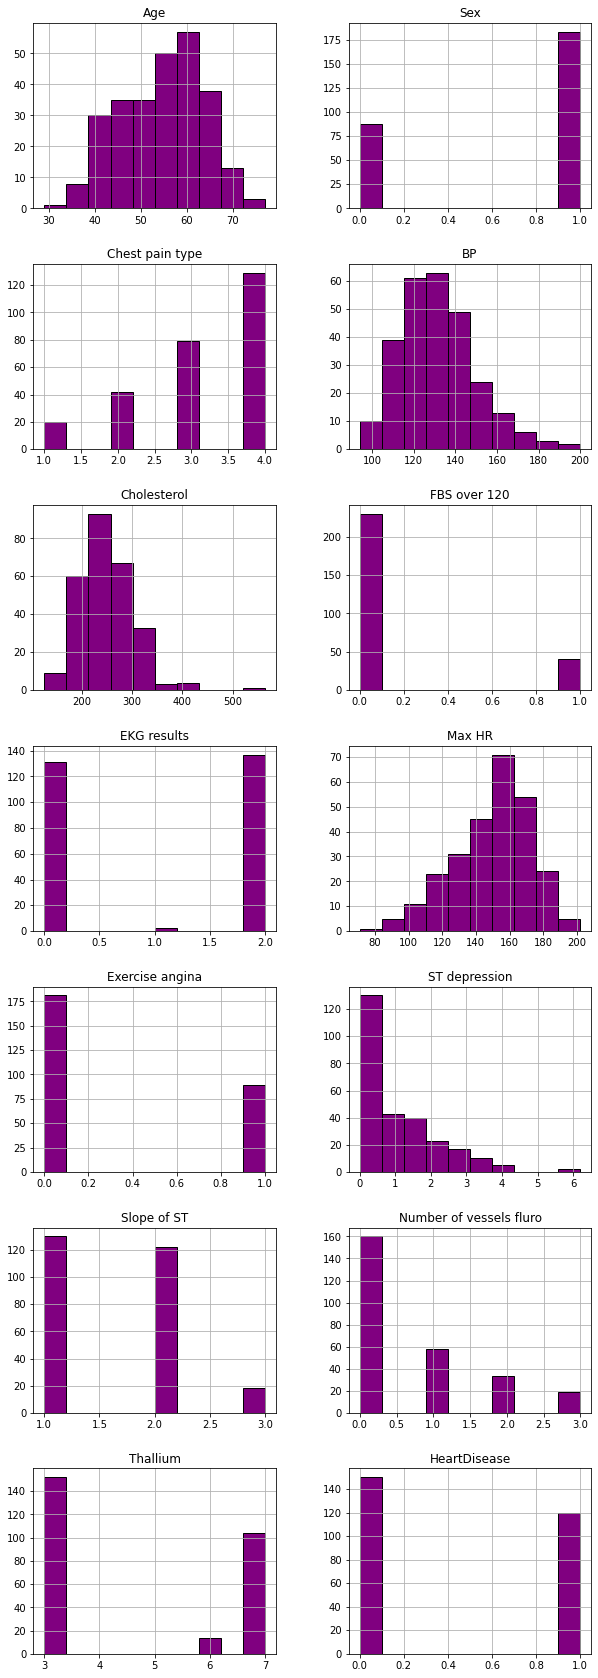

In [20]:
dataset.hist(edgecolor='black',layout = (7, 2),
            figsize = (10, 30),
            color=['purple'])

# Exploratory Data Analysis (EDA)

## Gender distribution based on heart disease

In [22]:
dataset["Sex"].unique()

array([1, 0], dtype=int64)

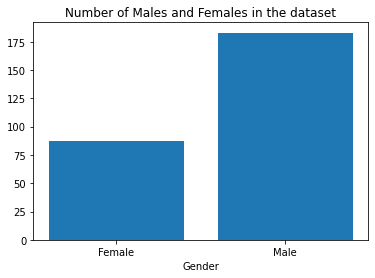

In [23]:
# Number of males and females
F = dataset[dataset["Sex"] == 0].count()["HeartDisease"]
M = dataset[dataset["Sex"] == 1].count()["HeartDisease"]

# Create a plot
figure, ax = plt.subplots(figsize = (6, 4))
ax.bar(x = ['Female', 'Male'], height = [F, M])
plt.xlabel('Gender')
plt.title('Number of Males and Females in the dataset')
plt.show()

### Heart Disease frequency for gender

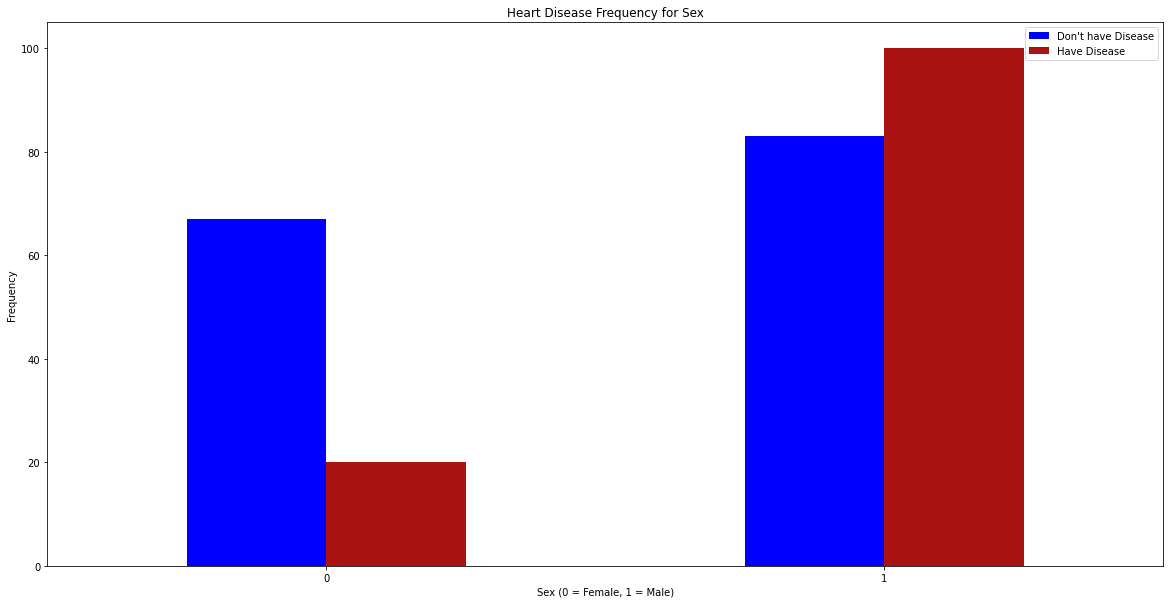

In [24]:
pd.crosstab(dataset.Sex,dataset.HeartDisease).plot(kind="bar",figsize=(20,10),color=['blue','#AA1111' ])
plt.title('Heart Disease Frequency for Sex')
plt.xlabel('Sex (0 = Female, 1 = Male)')
plt.xticks(rotation=0)
plt.legend(["Don't have Disease", "Have Disease"])
plt.ylabel('Frequency')
plt.show()

In [25]:
countFemale = len(dataset[dataset.Sex == 0])
countMale = len(dataset[dataset.Sex == 1])
print("Percentage of Female Patients:{:.2f}%".format((countFemale)/(len(dataset.Sex))*100))
print("Percentage of Male Patients:{:.2f}%".format((countMale)/(len(dataset.Sex))*100))

Percentage of Female Patients:32.22%
Percentage of Male Patients:67.78%


## Age distribution based on heart disease

C:\Users\rajkumar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rajkumar\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rajkumar\anaconda3\lib\site-packages\seaborn\distributions.py:2657: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\rajkumar\anaconda3\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret

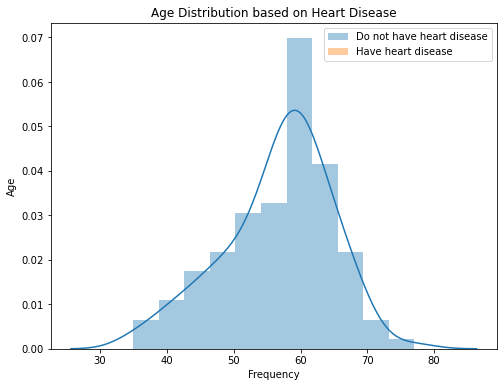

In [26]:
# Display age distribution based on heart disease
sns.distplot(dataset[dataset['HeartDisease'] == 1]['Age'], label='Do not have heart disease')
sns.distplot(dataset[dataset['HeartDisease'] == 2]['Age'], label = 'Have heart disease')
plt.xlabel('Frequency')
plt.ylabel('Age')
plt.title('Age Distribution based on Heart Disease')
plt.legend()
plt.show()

In [35]:
print('Min age of people who do not have heart disease: ', min(dataset[dataset['HeartDisease'] == 0]['Age']))
print('Max age of people who do not have heart disease: ', max(dataset[dataset['HeartDisease'] == 0]['Age']))
print('Average age of people who do not have heart disease: ', dataset[dataset['HeartDisease'] == 0]['Age'].mean())

Min age of people who do not have heart disease:  29
Max age of people who do not have heart disease:  76
Average age of people who do not have heart disease:  52.70666666666666


In [34]:
print('Min age of people who have heart disease: ', min(dataset[dataset['HeartDisease'] == 1]['Age']))
print('Max age of people who have heart disease: ', max(dataset[dataset['HeartDisease'] == 1]['Age']))
print('Average age of people who have heart disease: ', dataset[dataset['HeartDisease'] == 1]['Age'].mean())

Min age of people who have heart disease:  35
Max age of people who have heart disease:  77
Average age of people who have heart disease:  56.59166666666667


### Heart Disease Frequency for ages

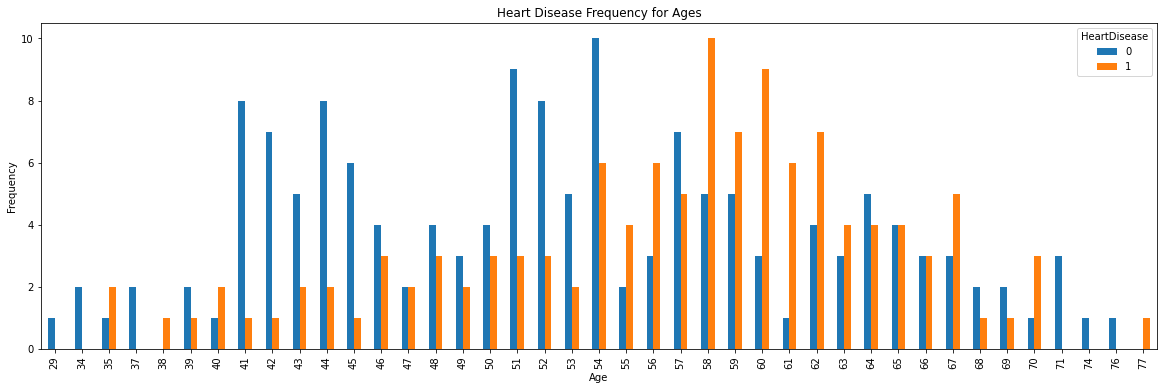

In [31]:
pd.crosstab(dataset.Age,dataset.HeartDisease).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('heartDiseaseAndAges.png')
plt.show()